# Análisis de datos con Pandas

Para esta primera etapa, utilizaremos la librería [Pandas](https://pandas.pydata.org/). En particular, utilizaremos esta librería para leer un conjunto de datos y realizar un análisis exploratorio de estos. En caso de dudas, [la documentación de Pandas es un excelente lugar para partir](https://pandas.pydata.org/docs/index.html), aunque también hay muchas respuestas en [StackOverflow](https://stackoverflow.com/).

### Recursos adicionales

- [10 minutos introduccion a pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
- [Pandas en IPython notebooks](http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/blob/master/cookbook/A%20quick%20tour%20of%20IPython%20Notebook.ipynb)
- [Leer archivos CSV, ZIP, JSON, o mas de Pandas Library](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

Primero vamos a corroborar que Pandas (y otras librerías que usaremos) se encuentre instalado en nuestro equipo, para ello ejecutamos la siguiente línea.

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display

Si nos entrega un error `ModuleNotFoundError` significa que no contamos con la librería, por lo que es necesario instalarla. Al igual que lo hacemos en nuestros computadores, utilizaremos `pip` para instalar librerías en Python. El formato de la sentencia es `pip install NOMBRE_LIBRERIA`. En este caso, el comando es `pip install pandas`. Este tipo de comandos no se ejecutan en Python, sino que en la consola/terminal de nuestro entorno. Cuando utilicemos Jupyter o Colab debemos anteponer el carácter exclamación "!" para introducir una secuencia de consola.

In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Al ejecutar el comando `pip install` verás como se cargan las librerías necesarias o una confirmación de que todo está en orden si es que ya cuentas con Pandas instalado. Cabe destacar que no todas las librerías cuentan con la facilidad de ser instaladas mediante `pip install`. Además, algunas librerías que veremos más adelante, dependen de otras librerías, las que deben estar instaladas antes de instalar nuestra librería objetivo. Por eso, es muy importante informarse sobre este proceso.

Continuando con el análisis exploratorio, antes de cargar los datos, vamos a describir las 2 estructuras de datos clave en Pandas: Series y DataFrames

* **`Serie`**: se puede entender como un arreglo unidimensional etiquetado/indexado. Se puede acceder a elementos individuales de esta Serie a través de estas etiquetas.

* **`DataFrame`**: es similar a un libro de Excel, ya que tiene nombres de columnas que hacen referencia a ellas y tiene filas, a las que se puede acceder mediante el uso de un índice. La diferencia esencial es que acá, los nombres de columna y los números de fila se conocen como índice de columna y fila.

Series y DataFrames forman el modelo de datos básicos para Pandas en Python. Los conjuntos de datos se leen primero en DataFrames y luego se pueden aplicar fácilmente varias operaciones (por ejemplo, agrupar por, agregación, etc.) a sus columnas.

## Manipulación de series y dataframes

Vamos a crear nuestra propia base de datos, en donde representaremos Ciudades de Estados Unidos y su respectiva area y población.

In [ ]:
area = pd.Series({'California': 423967,'Texas': 695662, 'New York': 141297,'Florida': 170312, 'Illinois': 149995})
pop = pd.Series({'California': 38332521,'Texas': 26448193, 'New York': 19651127,'Florida': 19552860, 'Illinois': 12882135})
eagles = pd.Series({'California': 21621,'Texas': 43432, 'New York': 153,'Florida': 2345, 'Illinois': 324})
data = pd.DataFrame({'area':area, 'pop':pop,'eagles':eagles})

In [ ]:
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

Visualicemos este DataFrame recién creado.

In [ ]:
data

,area,pop,eagles
California,423967,38332521,21621
Texas,695662,26448193,43432
New York,141297,19651127,153
Florida,170312,19552860,2345
Illinois,149995,12882135,324


In [ ]:
data.shape

(5, 3)

In [ ]:
data.columns

Index(['area', 'pop', 'eagles'], dtype='object')

In [ ]:
data.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

Para obtener algunas estadísticas básicas de las columnas, puede usar `.describe()` para datos discretos o `.value_counts` para datos categoricos.

In [ ]:
data.describe()

,area,pop,eagles
count,5.000000,5.000000e+00,5.00000
mean,316246.600000,2.337337e+07,13575.00000
std,242437.411951,9.640386e+06,18960.68663
min,141297.000000,1.288214e+07,153.00000
25%,149995.000000,1.955286e+07,324.00000
50%,170312.000000,1.965113e+07,2345.00000
75%,423967.000000,2.644819e+07,21621.00000
max,695662.000000,3.833252e+07,43432.00000


In [ ]:
df = pd.DataFrame({"A": ["Chile", "Chile", "Argentina"], "B": ["Argentina", "Argentina", "Brasil"]})
df.value_counts()

A          B        
Chile      Argentina    2
Argentina  Brasil       1
dtype: int64

Muchas veces tenemos una cantidad enorme de datos, del orden de miles o millones. Para obtener una previsualizacion rapida podemos usar la funcion `.head` y ver las top 5 (por defecto) filas del dataset.

In [ ]:
data.head(2)  # En este caso, pedimos las 2 primeras filas

,area,pop,eagles
California,423967,38332521,21621
Texas,695662,26448193,43432


In [ ]:
data.tail(2)

,area,pop,eagles
Florida,170312,19552860,2345
Illinois,149995,12882135,324


Ahora que está creado, podemos acceder a varios de sus datos internos, ya sea por columna o por fila.

In [ ]:
# Valores en la columna 'area' (accediendo como llave)
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [ ]:
# Valores en la columna 'area' (accediendo como atributo)
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

In [ ]:
# Valores entre las filas con identificador 'Texas' y 'Florida'
data['Texas':'Florida']

,area,pop,eagles
Texas,695662,26448193,43432
New York,141297,19651127,153
Florida,170312,19552860,2345


In [ ]:
data

,area,pop,eagles
California,423967,38332521,21621
Texas,695662,26448193,43432
New York,141297,19651127,153
Florida,170312,19552860,2345
Illinois,149995,12882135,324


In [ ]:
# Valores en las filas entre los índices 1 y 3, por medio de slicing
# (Recordar que en Python los índices parten en 0)
data[1:3]

,area,pop,eagles
Texas,695662,26448193,43432
New York,141297,19651127,153


Para examinar filas y columnas específicas de un DataFrame, Pandas ofrece los métodos `iloc` y `loc`. `iloc` se usa cuando quieres especificar una lista o rango de índices, y `.loc` se usa cuando quieres especificar una lista o rango de etiquetas (o labels).

Para ambos métodos se deben especificar dos elementos, donde el primer elemento indica las filas a seleccionar y el segundo elemento indica las columnas a seleccionar. Si se quiere seleccionar todas la sfilas/columnas, normalmente usaremos `:` (un slicing vacío).

In [ ]:
# Accedemos a los datos por la posición, usando iloc
data.iloc[:2,:1]  # Hasta la fila 2, hasta la columna 1

,area
California,423967
Texas,695662


In [ ]:
# Accedemos a los datos por si nombre, usando loc
data.loc[:, :'pop']  # Todas las filas, hasta la columna pop

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


In [ ]:
data

,area,pop,eagles
California,423967,38332521,21621
Texas,695662,26448193,43432
New York,141297,19651127,153
Florida,170312,19552860,2345
Illinois,149995,12882135,324


In [ ]:
cities = ["New York", "California"]
columns = ["pop", "area"]
result = data.loc[cities, columns]
result

,pop,area
New York,19651127,141297
California,38332521,423967


In [ ]:
result.describe()

,pop,area
count,2.000000e+00,2.000000
mean,2.899182e+07,282632.000000
std,1.320974e+07,199877.873838
min,1.965113e+07,141297.000000
25%,2.432148e+07,211964.500000
50%,2.899182e+07,282632.000000
75%,3.366217e+07,353299.500000
max,3.833252e+07,423967.000000


## Modificación de estructura

Pandas entrega mucha flexibilidad para manejar los datos, con una sintaxis intuitiva. Por ejemplo, aqui estamos creando una nueva columna con la informacion de densidad.

In [ ]:
data

,area,pop,eagles
California,423967,38332521,21621
Texas,695662,26448193,43432
New York,141297,19651127,153
Florida,170312,19552860,2345
Illinois,149995,12882135,324


In [ ]:
data['density'] = data['pop'] / data['area']
data

,area,pop,eagles,density
California,423967,38332521,21621,90.413926
Texas,695662,26448193,43432,38.018740
New York,141297,19651127,153,139.076746
Florida,170312,19552860,2345,114.806121
Illinois,149995,12882135,324,85.883763


In [ ]:
data["density"] > 86

California     True
Texas         False
New York       True
Florida        True
Illinois      False
Name: density, dtype: bool

In [ ]:
# Podemos ver los valores donde la densidad es mayor a algún valor
data[data.density > 86]

,area,pop,eagles,density
California,423967,38332521,21621,90.413926
New York,141297,19651127,153,139.076746
Florida,170312,19552860,2345,114.806121


In [ ]:
# Podemos ver los valores de ciertas columnas, donde se cumple una condición
data.loc[data.density > 100, ['pop', 'eagles']]

,pop,eagles
New York,19651127,153
Florida,19552860,2345


Si se fijan, ninguna de estas acciones ha mutado permanentemente el DataFrame

In [ ]:
data

,area,pop,eagles,density
California,423967,38332521,21621,90.413926
Texas,695662,26448193,43432,38.018740
New York,141297,19651127,153,139.076746
Florida,170312,19552860,2345,114.806121
Illinois,149995,12882135,324,85.883763


In [ ]:
# Ciudades donde densidad sea > 100
ciudades_de_mucha_densidad = data["density"] > 100  # Selector de files
# Asignar eagles = 0 en esas ciudades
data.loc[ciudades_de_mucha_densidad, "eagles"] = 0


In [ ]:
data

,area,pop,eagles,density
California,423967,38332521,21621,90.413926
Texas,695662,26448193,43432,38.018740
New York,141297,19651127,0,139.076746
Florida,170312,19552860,0,114.806121
Illinois,149995,12882135,324,85.883763


# Operaciones entre dataframes y funciones

Utilizaremos Numpy para crear datos con que probar estas funciones.

In [ ]:
valores = [[1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12], [13, 14, 15, 16, 17, 18]]
valores

[[1, 2, 3, 4, 5, 6], [7, 8, 9, 10, 11, 12], [13, 14, 15, 16, 17, 18]]

In [ ]:
np.array(valores)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18]])

In [ ]:
rng = np.random.RandomState(0)

In [ ]:
df = pd.DataFrame(
    rng.randint(0, 10, (3, 4)),
    columns=['A','B','C','D'],
    index=["Primero", "Segundo", "Tercero"],
)
df

,A,B,C,D
Primero,5,0,3,3
Segundo,7,9,3,5
Tercero,2,4,7,6


In [ ]:
df.values

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

Podemos usar `numpy.exp` para calcular el exponencial $e^x$ de todos los elementos en el array de entrada. En este caso podemos pasarle los datos de un DataFrame.

In [ ]:
np.exp(df[:2]) # Aquí el segundo índice queda fuera (tomamos el 0 y el 1)

,A,B,C,D
Primero,148.413159,1.000000,20.085537,20.085537
Segundo,1096.633158,8103.083928,20.085537,148.413159


In [ ]:
df

,A,B,C,D
Primero,5,0,3,3
Segundo,7,9,3,5
Tercero,2,4,7,6


In [ ]:
np.sin(df * np.pi / 4)

,A,B,C,D
Primero,-0.707107,0.000000e+00,0.707107,0.707107
Segundo,-0.707107,7.071068e-01,0.707107,-0.707107
Tercero,1.000000,1.224647e-16,-0.707107,-1.000000


In [ ]:
data['density'] = np.sin(data['pop']) / data['area']

In [ ]:
# 2.235432e-06 = 2.235432*10^{-6}
data

,area,pop,eagles,density
California,423967,38332521,21621,2.235432e-06
Texas,695662,26448193,43432,-1.172419e-06
New York,141297,19651127,0,-2.772089e-08
Florida,170312,19552860,0,5.303556e-06
Illinois,149995,12882135,324,1.543027e-06


## Interaccion entre DataFrames

In [ ]:
# list('AB)= ['A','B']
A = pd.DataFrame(rng.randint(0, 20, (2, 2)), columns=list('AB'))
A

,A,B
0,12,1
1,6,7


In [ ]:
 B = pd.DataFrame(rng.randint(0, 10, (3, 3)), columns=list('ABC'))
 B

,A,B,C
0,7,8,1
1,5,9,8
2,9,4,3


In [ ]:
# restando dataframes
# que pasa con esos valores nulos?
A - B

,A,B,C
0,5.0,-7.0,NaN
1,1.0,-2.0,NaN
2,NaN,NaN,NaN


In [ ]:
# multiplicacion de dataframes con df.mul()
A.mul(B)

,A,B,C
0,84.0,8.0,NaN
1,30.0,63.0,NaN
2,NaN,NaN,NaN


In [ ]:
# podemos preguntar tambien por datos nulos
# aqui estamos "simulando" una resta y viendo que ocurre
(A-B).isnull()

,A,B,C
0,False,False,True
1,False,False,True
2,True,True,True


# Valores Nulos

Ya vimos que los DataFrames pueden contener valores nulos. Hay varias funciones de Pandas que permiten interactuar con estos valores, y que podrian ahorrar mucho tiempo al momento de hacer limpieza de datos.

In [ ]:
# np.nan nos entrega un valor nulo
data = pd.Series([1, np.nan, 'hola', None])
data

0       1
1     NaN
2    hola
3    None
dtype: object

In [ ]:
# buscando valores nulos
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [ ]:
# buscando valores no nulos
data[data.notnull()]

0       1
2    hola
dtype: object

In [ ]:
data[~data.isnull()]

0       1
2    hola
dtype: object

In [ ]:
df = pd.DataFrame([[1, np.nan, 2], [2,3,5], [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [ ]:
# la funcion df.dropna() nos ayuda a eliminar todos los valores nulos.
# en este caso, le estamos entregando 'rows' como parametro porque queremos que elimine las filas completas
df.dropna(axis="rows")

,0,1,2
1,2.0,3.0,5


In [ ]:
# en este caso, le estamos entregando 'columns' como parametro porque queremos que elimine las columnas completas
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [ ]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [ ]:
# podemos facilmente re-escribir datos
df[3] = 1
df

,0,1,2,3
0,1.0,NaN,2,1
1,2.0,3.0,5,1
2,NaN,4.0,6,1


In [ ]:
# la funcion df.fillna() llena los datos NA/NaN segun algun parametro
# aqui le pedimos que lo haga con la media, y por defecto toma la columna
df.fillna(df.mean())

,0,1,2,3
0,1.0,3.5,2,1
1,2.0,3.0,5,1
2,1.5,4.0,6,1


In [ ]:
df.mean(axis=1)

0    1.333333
1    2.750000
2    3.666667
dtype: float64

In [ ]:
df.mean(axis=0)

0    1.500000
1    3.500000
2    4.333333
3    1.000000
dtype: float64

# Concatenación y joins

Vimos operaciones simples sobre DataFrames. Funciones mas sofisticadas de Pandas nos permiten concatenar estructuras bajo criterios dados.

* Para entender la diferencia entre joins, les recomiendo leer [este articulo](https://www.analyticsvidhya.com/blog/2020/02/joins-in-pandas-master-the-different-types-of-joins-in-python/)

In [ ]:
# vamos a crear nuestra propia funcion, para poder reutilizar codigo
def make_df(cols, ind):
  # esto se llama list comprehension
  data = {c: [str(c)+str(i) for i in ind] for c in cols}
  return pd.DataFrame(data, ind)

In [ ]:
# probemos
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [ ]:
# ahora voy a asignarlo a una variable
df1 = make_df('AB', [1,2])
df1

,A,B
1,A1,B1
2,A2,B2


In [ ]:
# y creare una segunda estructura
df2 = make_df('AB', [3,4])
df2

,A,B
3,A3,B3
4,A4,B4


El parametro de combinatoria 'outer' combina datos donde los encabezados son similares. Incluye todos los datos y completa los valores comparativos vacíos con 'NaN' para cuando falta un dato.

In [ ]:
# aqui estamos usando una funcion directa de pandas
# vamos a concatenar estos dos df, en el eje 1 que significan columnas
dfc = pd.concat([df1,df2], axis=1, join='outer')
dfc

,A,B,A,B
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
3,NaN,NaN,A3,B3
4,NaN,NaN,A4,B4


In [ ]:
display(df1, df2, dfc)
# que esta pasando?

,A,B
1,A1,B1
2,A2,B2


,A,B
3,A3,B3
4,A4,B4


,A,B,A,B
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
3,NaN,NaN,A3,B3
4,NaN,NaN,A4,B4


El parametro de combinatoria 'inner' requiere que cada fila en los conjuntos de datos tenga valores de columna coincidentes.

In [ ]:
dfc = pd.concat([df1,df2], axis=0, join='inner')
dfc

,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


### Merge o concat??

Una distinción importante entre `concat` y `merge`: `concat` se usa para combinar conjuntos de datos y NO hace match con columnas (es decir, concat mostrará columnas repetidas en el marco de datos). `merge`, por otro lado, se usa para combinar dos DataFrames con las mismas columnas o índice.

In [ ]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

In [ ]:
display(df1, df2)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [ ]:
# cual es la diferencia con concat?
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [ ]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
df4

,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [ ]:
display(df3, df4, pd.merge(df3,df4))

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [ ]:
pd.merge(pd.merge(df1, df2), df4)

,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


# Ejercicio Práctico

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import display
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 16})

In [ ]:
df = pd.read_csv("sample_data/california_housing_train.csv")

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df["median_income"].round().astype(int).value_counts().sort_index()

0       11
1      647
2     3299
3     4312
4     3727
5     2317
6     1288
7      594
8      377
9      131
10     114
11      74
12      33
13      27
14       8
15      41
Name: median_income, dtype: int64

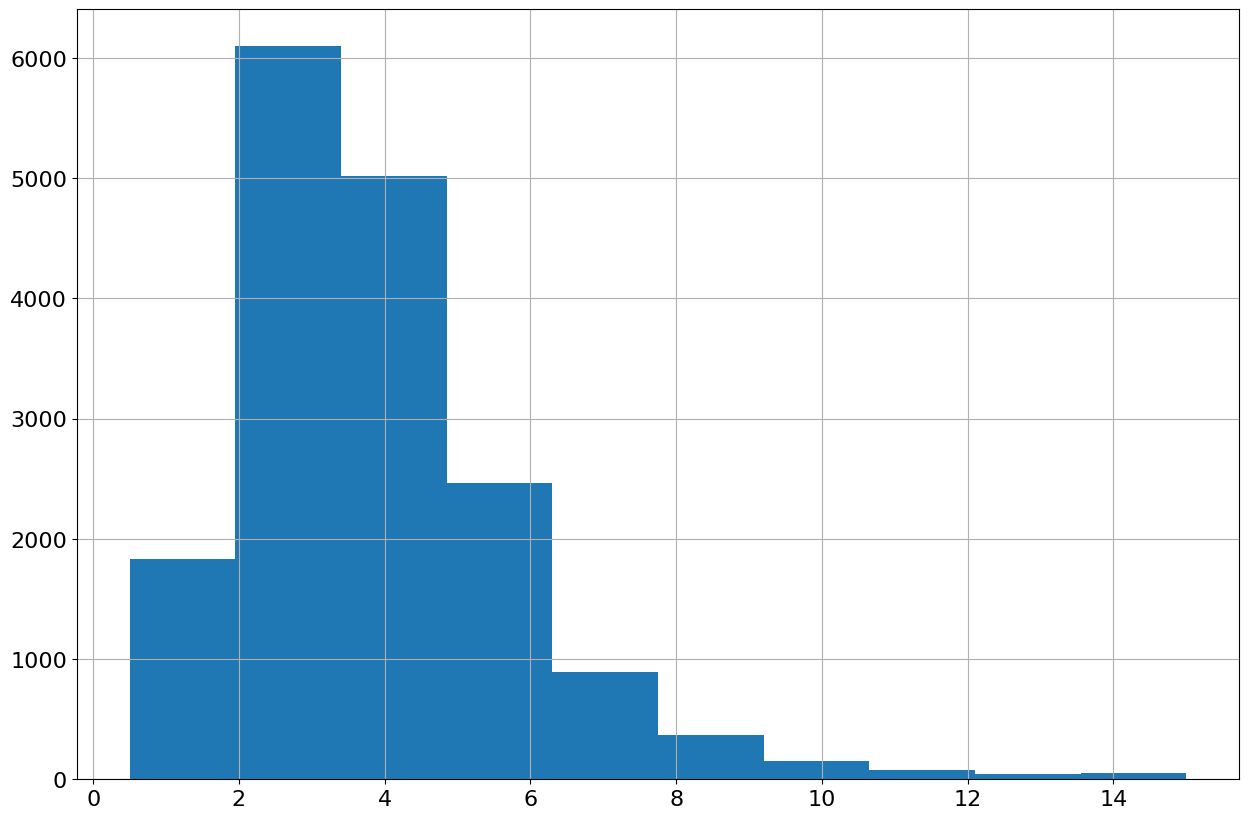

In [ ]:
df["median_income"].hist(bins=10)
plt.show()

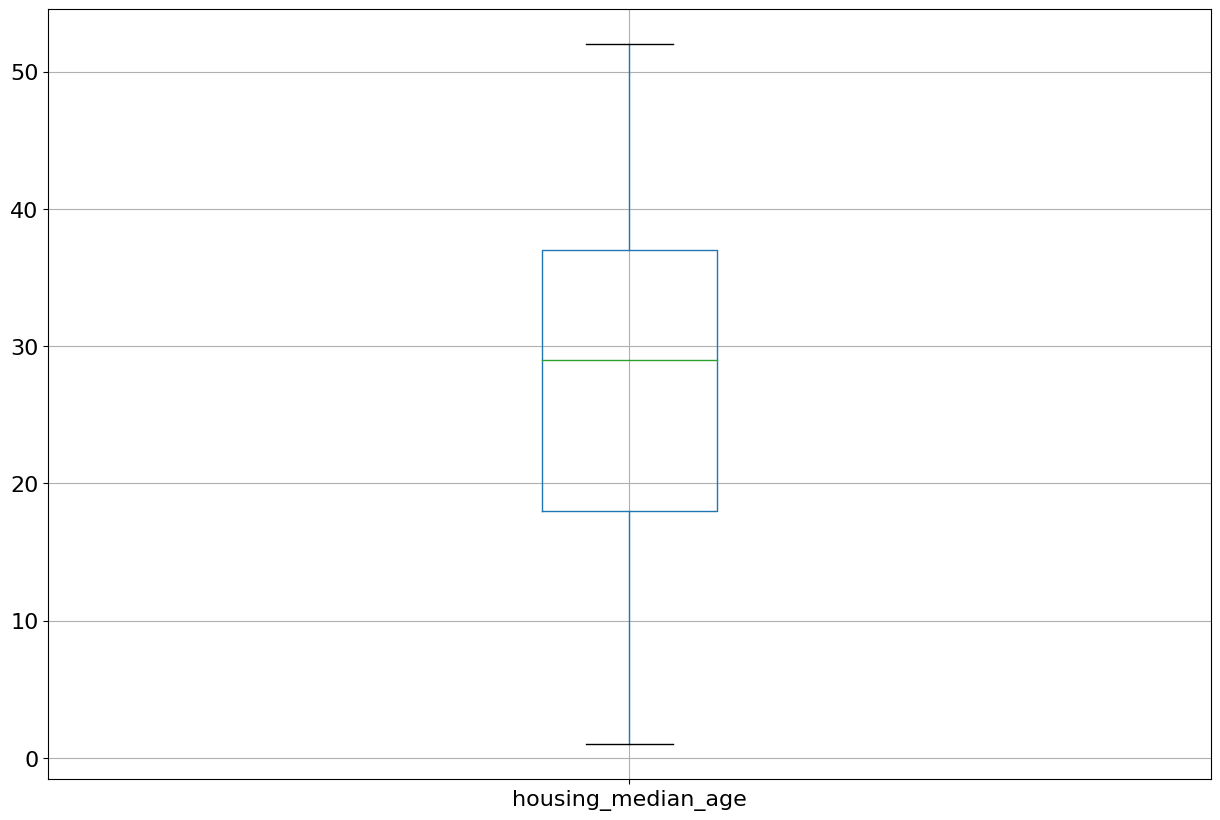

In [ ]:
df.boxplot(column="housing_median_age")
plt.show()

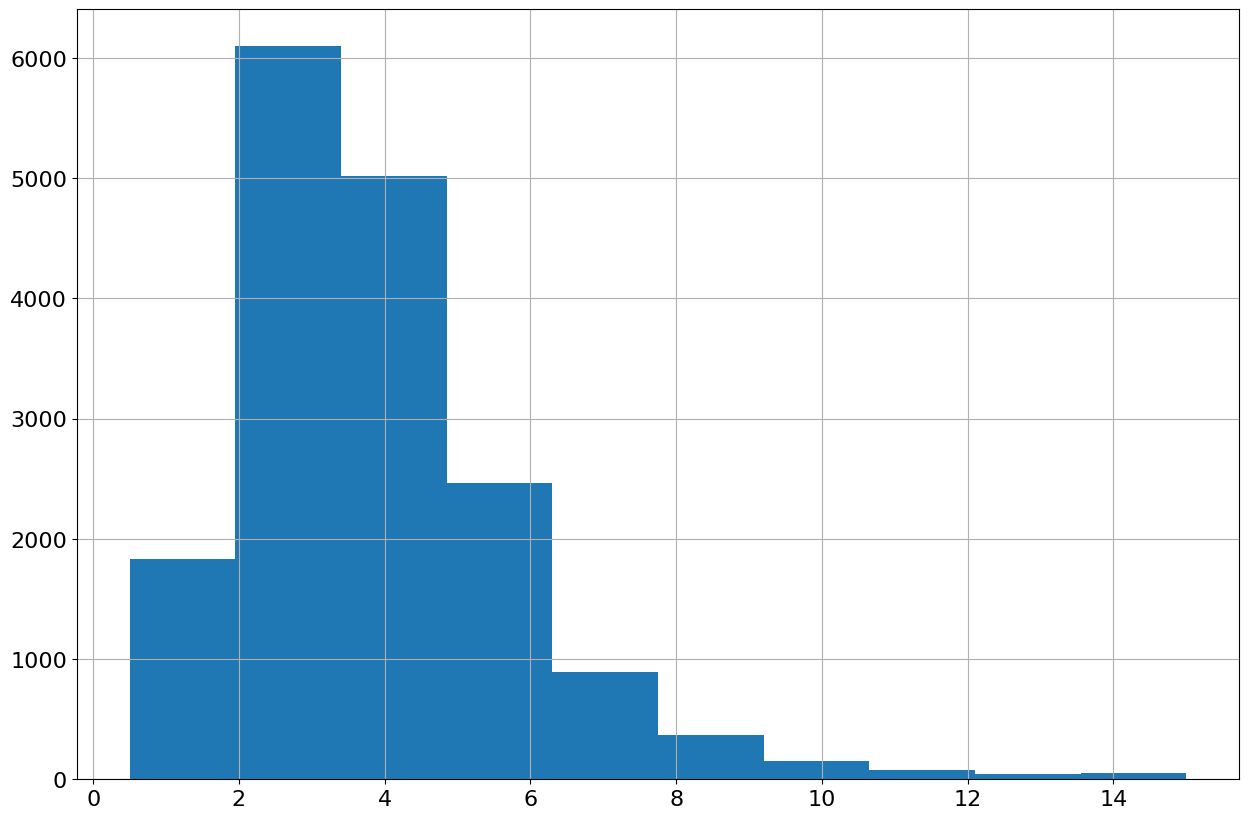

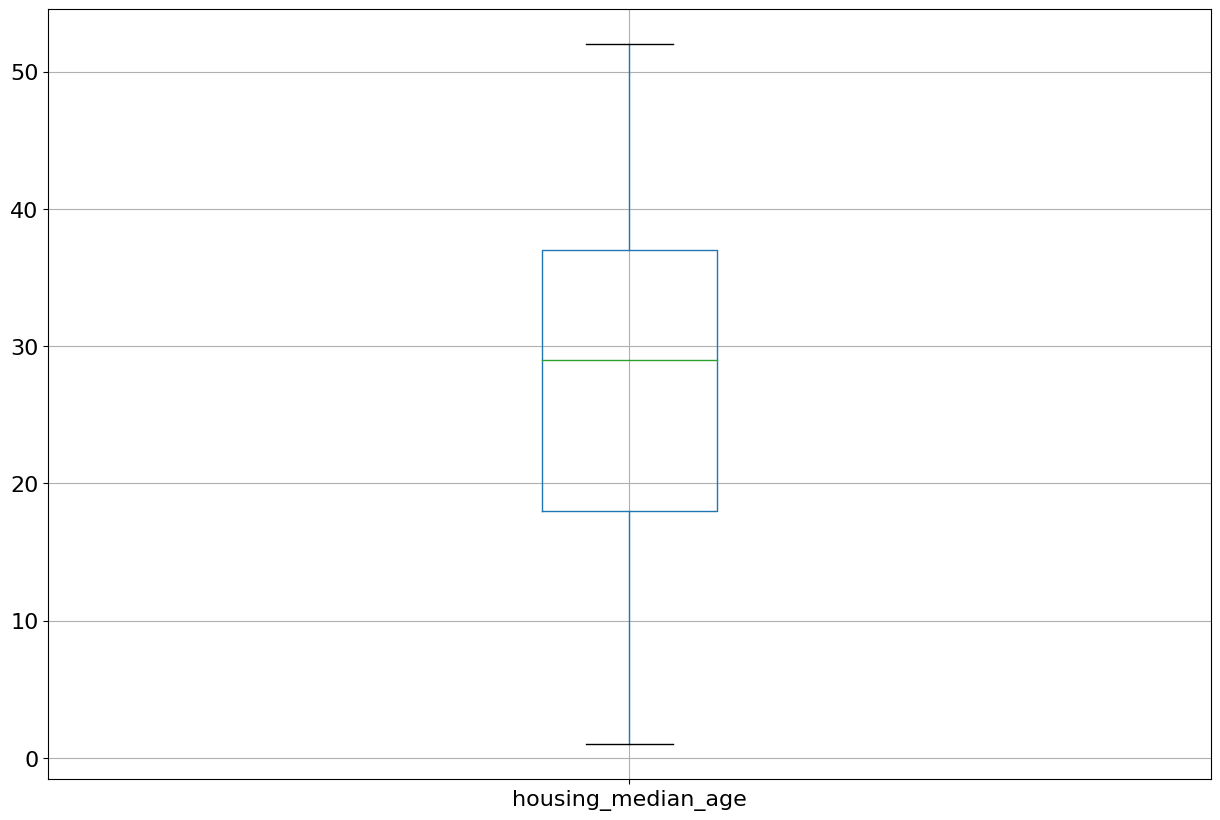

In [ ]:
df["median_income"].hist(bins=10)
plt.show()
df.boxplot(column="housing_median_age")
plt.show()